In [1]:
import wecgrid
engine = wecgrid.Engine()
engine.case("IEEE30")
engine.load(["psse", "pypsa"]) 




 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 30 records for Bus data
 Starting processing of Load data records
 Finished processing of 21 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 2 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 6 records for Generator data
 Starting processing of Branch data records
 Finished processing of 37 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 16 records for 4 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of Tw

In [2]:
engine.apply_wec(farm_name="WEC-FARM", size = 10, sim_id=2, bus_location=31, connecting_bus=1, model="RM3")

In [2]:
engine.simulate(load_curve=True)

PyPSA Simulating: 100%|██████████| 288/288 [01:27<00:00,  3.29step/s]


In [11]:
engine.pypsa.network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
G0,1,Slack,,10000.0,False,-10000.0,10000.0,-1.0,1.0,260.948,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G1,2,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,40.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G2,5,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G3,8,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G4,11,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G5,13,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
W1,31,PV,,0.0,False,0.0,inf,0.0,1.0,0.001,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [17]:
engine1 = wecgrid.Engine()
engine1.case("IEEE30")
engine1.load(["psse", "pypsa"]) 

engine1.simulate(load_curve=True)

INFO:pssepath.core:psspath has already added PSSBIN to the system, continuing.


PSS®E software initialized
PyPSA software initialized


PyPSA Simulating: 100%|██████████| 288/288 [01:23<00:00,  3.47step/s]


In [ ]:
engine.psse.grid.gen_t.keys(

dict_keys(['bus', 'p', 'q', 'base', 'status'])

In [6]:
ierr, buses = engine.psse.psspy.amachint(string=['NUMBER','IREG'])
for b, ireg in zip(*buses):
    if ireg != b and ireg != 0:
        print(f"Gen at bus {b} regulates remote bus {ireg}")

TypeError: type object argument after * must be an iterable, not NoneType

In [ ]:
engine.psse.psspy.amachint(string=['NUMBER','IREG'])

(6, None)

<AxesSubplot:>

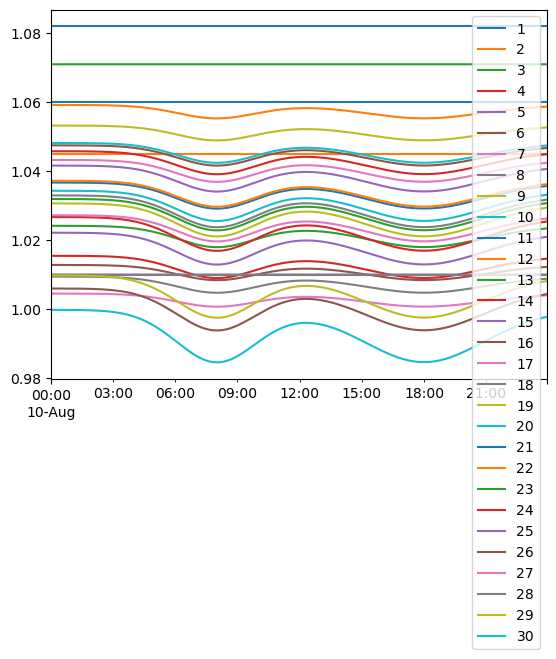

In [11]:
engine.psse.grid.bus_t.v_mag.plot()

<AxesSubplot:>

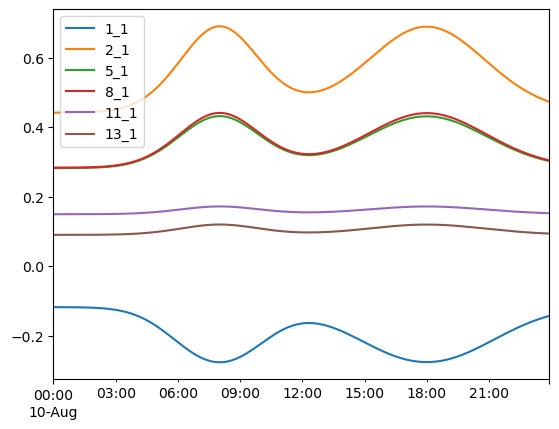

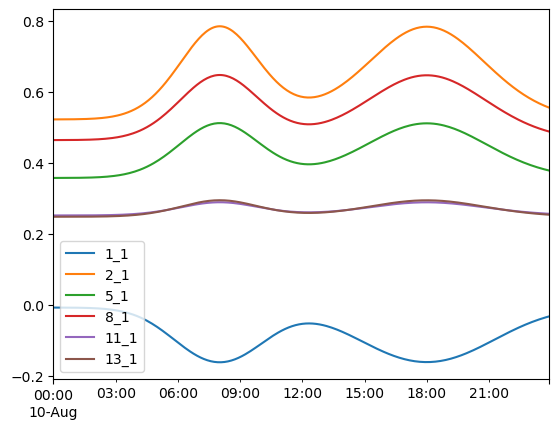

In [3]:
# engine1.psse.grid.gen_t.p.plot()
# engine1.pypsa.grid.gen_t.p.plot()
engine.psse.grid.gen_t.q.plot()
engine.pypsa.grid.gen_t.q.plot()

In [15]:
engine.pypsa.network.loads.p_set

Load
L0     21.7
L1      2.4
L2      7.6
L3     94.2
L4     22.8
L5     30.0
L6      5.8
L7     11.2
L8      6.2
L9      8.2
L10     3.5
L11     9.0
L12     3.2
L13     9.5
L14     2.2
L15    17.5
L16     3.2
L17     8.7
L18     3.5
L19     2.4
L20    10.6
Name: p_set, dtype: float64

In [19]:
engine.pypsa.network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
L0,2,AC,,21.7,12.7,-1.0
L1,3,AC,,2.4,1.2,-1.0
L2,4,AC,,7.6,1.6,-1.0
L3,5,AC,,94.2,19.0,-1.0
L4,7,AC,,22.8,10.9,-1.0
L5,8,AC,,30.0,30.0,-1.0
L6,10,AC,,5.8,2.0,-1.0
L7,12,AC,,11.2,7.5,-1.0
L8,14,AC,,6.2,1.6,-1.0


In [17]:
engine.generate_load_curves()

,2,3,4,5,7,8,10,12,14,15,...,17,18,19,20,21,23,24,26,29,30
2025-08-10 00:00:00,0.108536,0.012004,0.038013,0.471158,0.114038,0.150050,0.029010,0.056019,0.031010,0.041014,...,0.045015,0.016005,0.047516,0.011004,0.087529,0.016005,0.043515,0.017506,0.012004,0.053018
2025-08-10 00:05:00,0.108543,0.012005,0.038015,0.471186,0.114045,0.150059,0.029011,0.056022,0.031012,0.041016,...,0.045018,0.016006,0.047519,0.011004,0.087535,0.016006,0.043517,0.017507,0.012005,0.053021
2025-08-10 00:10:00,0.108551,0.012006,0.038018,0.471220,0.114053,0.150070,0.029014,0.056026,0.031014,0.041019,...,0.045021,0.016007,0.047522,0.011005,0.087541,0.016007,0.043520,0.017508,0.012006,0.053025
2025-08-10 00:15:00,0.108560,0.012007,0.038021,0.471258,0.114063,0.150082,0.029016,0.056031,0.031017,0.041022,...,0.045025,0.016009,0.047526,0.011006,0.087548,0.016009,0.043524,0.017510,0.012007,0.053029
2025-08-10 00:20:00,0.108570,0.012008,0.038024,0.471303,0.114073,0.150097,0.029019,0.056036,0.031020,0.041026,...,0.045029,0.016010,0.047531,0.011007,0.087556,0.016010,0.043528,0.017511,0.012008,0.053034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-10 23:35:00,0.110704,0.012244,0.038772,0.480565,0.116315,0.153046,0.029589,0.057137,0.031630,0.041833,...,0.045914,0.016325,0.048465,0.011223,0.089277,0.016325,0.044383,0.017855,0.012244,0.054076
2025-08-10 23:40:00,0.110460,0.012217,0.038686,0.479508,0.116059,0.152709,0.029524,0.057012,0.031560,0.041741,...,0.045813,0.016289,0.048358,0.011199,0.089081,0.016289,0.044286,0.017816,0.012217,0.053957
2025-08-10 23:45:00,0.110240,0.012192,0.038609,0.478554,0.115828,0.152406,0.029465,0.056898,0.031497,0.041658,...,0.045722,0.016257,0.048262,0.011176,0.088903,0.016257,0.044198,0.017781,0.012192,0.053850
2025-08-10 23:50:00,0.110042,0.012171,0.038540,0.477695,0.115620,0.152132,0.029412,0.056796,0.031441,0.041583,...,0.045640,0.016227,0.048175,0.011156,0.088744,0.016227,0.044118,0.017749,0.012171,0.053753


In [ ]:
engine.psse.load

,bus,p,q,base,status
load,,,,,
Load_2_0,2,0.217,0.127,132.0,1
Load_3_0,3,0.024,0.012,132.0,1
Load_4_0,4,0.076,0.016,132.0,1
Load_5_0,5,0.942,0.190,132.0,1
Load_7_0,7,0.228,0.109,132.0,1
Load_8_0,8,0.300,0.300,132.0,1
Load_10_0,10,0.058,0.020,33.0,1
Load_12_0,12,0.112,0.075,33.0,1
Load_14_0,14,0.062,0.016,33.0,1


In [26]:
engine.wec_farms[0].power_at_snapshot(timestamp=engine.time.snapshots[0])

0.008457722614067437

In [37]:
engine.pypsa.network.loads["bus"]

Load
L0      2
L1      3
L2      4
L3      5
L4      7
L5      8
L6     10
L7     12
L8     14
L9     15
L10    16
L11    17
L12    18
L13    19
L14    20
L15    21
L16    23
L17    24
L18    26
L19    29
L20    30
Name: bus, dtype: object

In [ ]:
engine.pypsa.network.buses.columns

Index(['v_nom', 'type', 'x', 'y', 'carrier', 'unit', 'v_mag_pu_set',
       'v_mag_pu_min', 'v_mag_pu_max', 'control', 'sub_network', 'generator'],
      dtype='object', name='attribute')

In [3]:
engine.apply_wec(farm_name="WEC-FARM", size = 1, sim_id=2, bus_location=31, connecting_bus=1, model="RM3")

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.045347 seconds


Starting MATLAB engine...
MATLAB engine started and WEC-SIM path added...
Starting WEC-SIM simulation...
simulation complete... writing to database
WEC-SIM complete: model = RM3, ID = 2, duration = 43200s
MATLAB engine stopped.


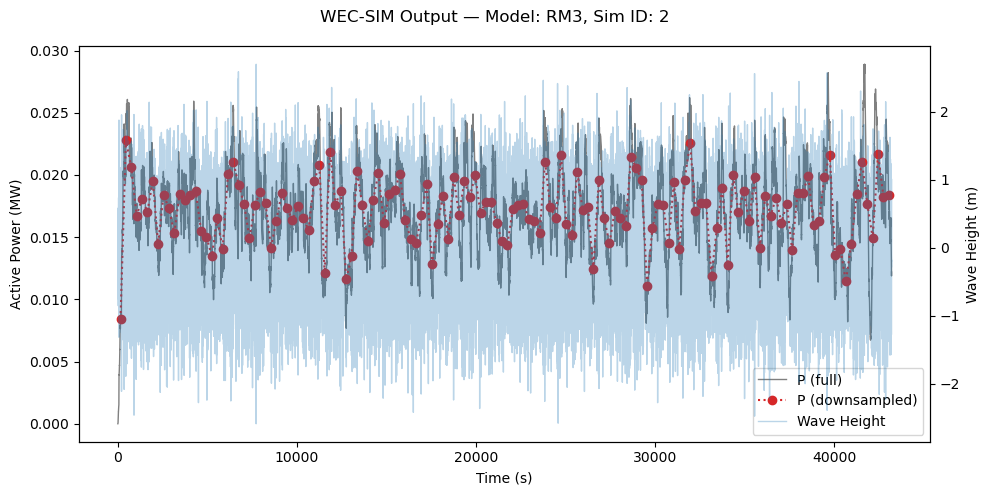

True

In [ ]:
#engine.wec_sim(sim_id=2, model="RM3"). 

In [2]:
engine.apply_wec(farm_name="WEC-FARM", size = 1, sim_id=2, bus_location=31, connecting_bus=1, model="RM3")

In [3]:
engine.simulate(load_curve=True)

Simulating:   0%|          | 0/144 [00:00<?, ?step/s]

Simulating: 100%|██████████| 144/144 [00:03<00:00, 37.35step/s]


In [ ]:
engine.wec_farms[0].wec_devices[0].dataframe_full

,time,p,q,base,eta
0,0.0,0.000000e+00,0.0,1.0,0.349918
1,0.1,3.342286e-09,0.0,1.0,0.271829
2,0.2,1.864300e-08,0.0,1.0,0.187037
3,0.3,5.832913e-08,0.0,1.0,0.097629
4,0.4,1.363197e-07,0.0,1.0,0.006283
...,...,...,...,...,...
35996,3599.6,1.772931e-02,0.0,1.0,0.049120
35997,3599.7,1.769936e-02,0.0,1.0,0.075164
35998,3599.8,1.767148e-02,0.0,1.0,0.097257
35999,3599.9,1.764587e-02,0.0,1.0,0.115020


In [2]:
engine.wec_sim(sim_id=81, model="RM3")

Starting MATLAB engine...
MATLAB engine started and WEC-SIM path added...
WEC-SIM complete: model=RM3, ID=81
MATLAB engine stopped.


True

In [2]:
engine.psse.state.load

,base,bus,load,p,q,status
0,132.0,2,Load_2_0,0.164394,0.096212,1
1,132.0,3,Load_3_0,0.018182,0.009091,1
2,132.0,4,Load_4_0,0.057576,0.012121,1
3,132.0,5,Load_5_0,0.713636,0.143939,1
4,132.0,7,Load_7_0,0.172727,0.082576,1
5,132.0,8,Load_8_0,0.227273,0.227273,1
6,33.0,10,Load_10_0,0.175758,0.060606,1
7,33.0,12,Load_12_0,0.339394,0.227273,1
8,33.0,14,Load_14_0,0.187879,0.048485,1
9,33.0,15,Load_15_0,0.248485,0.075758,1


In [3]:
engine.psse.state.line

,ibus,jbus,line,line_pct,status
0,1,2,Line_1_2_0,126.659653,1
1,1,3,Line_1_3_0,63.744675,1
2,2,4,Line_2_4_0,64.598465,1
3,2,5,Line_2_5_0,60.765957,1
4,2,6,Line_2_6_0,88.990562,1
5,3,4,Line_3_4_0,62.011822,1
6,4,6,Line_4_6_0,81.238983,1
7,5,7,Line_5_7_0,26.628374,1
8,6,7,Line_6_7_0,29.112637,1
9,6,8,Line_6_8_0,94.812935,1


In [4]:
engine.apply_wec(farm_name="WEC-FARM", size = 8, sim_id=1, bus_location=31, connecting_bus=1, model="RM3")

In [11]:
engine.wec_farms[0].wec_devices[0]

WECDevice:
    ├─ name: 'RM3_1_0'
    ├─ model: 'RM3'
    ├─ bus_location: 31
    ├─ sim_id: 1
    ├─ MBASE: 0.1
    └─ rows: 288
    

In [ ]:
engine.pypsa.grid.

{'bus_name':                      1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26  \
 2025-08-10 00:00:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 00:05:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 00:10:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 00:15:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 00:20:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 ...                 .. .. .. .. .. .. .. .. ..  ..  ...  ..  ..  ..  ..  ..   
 2025-08-10 11:35:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 11:40:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 11:45:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 11:50:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 2025-08-10 11:55:00  1  2  3  4  5  6  7  8  9  10  ...  22  23  24  25  26   
 
                      27  

In [5]:
engine.psse.grid.gen_t.p

,1_1,2_1,5_1,8_1,11_1,13_1,31_W1
2025-08-10 00:00:00,-0.359291,0.4,0.0,0.0,0.0,0.0,0.084577
2025-08-10 00:05:00,-0.359304,0.4,0.0,0.0,0.0,0.0,0.227916
2025-08-10 00:10:00,-0.35928,0.4,0.0,0.0,0.0,0.0,0.206039
2025-08-10 00:15:00,-0.35924,0.4,0.0,0.0,0.0,0.0,0.167328
2025-08-10 00:20:00,-0.359252,0.4,0.0,0.0,0.0,0.0,0.181047
...,...,...,...,...,...,...,...
2025-08-10 11:35:00,-0.354651,0.4,0.0,0.0,0.0,0.0,0.176401
2025-08-10 11:40:00,-0.354932,0.4,0.0,0.0,0.0,0.0,0.149419
2025-08-10 11:45:00,-0.355287,0.4,0.0,0.0,0.0,0.0,0.216797
2025-08-10 11:50:00,-0.355521,0.4,0.0,0.0,0.0,0.0,0.182494


In [11]:
engine.wec_farms[0].wec_devices[0]

WECDevice:
    ├─ name: 'RM3_2_0'
    ├─ model: 'RM3'
    ├─ bus_location: 31
    ├─ sim_id: 2
    ├─ base: 1.0 MW
    └─ rows: 144
    

In [13]:
engine.pypsa.network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
G0,1,Slack,,10000.00,False,-10000.0,10000.00,-1.0,1.0,260.948,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G1,2,PV,,10000.00,False,-10000.0,10000.00,-1.0,1.0,40.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G2,5,PV,,10000.00,False,-10000.0,10000.00,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G3,8,PV,,10000.00,False,-10000.0,10000.00,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G4,11,PV,,10000.00,False,-10000.0,10000.00,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G5,13,PV,,10000.00,False,-10000.0,10000.00,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
W1,31,PV,,0.03,False,0.0,0.03,0.0,1.0,0.001,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [6]:
engine.pypsa.network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
G0,1,Slack,,10000.0,False,-10000.0,10000.0,-1.0,1.0,260.948,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G1,2,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,40.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G2,5,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G3,8,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G4,11,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
G5,13,PV,,10000.0,False,-10000.0,10000.0,-1.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
W1,31,PV,,0.0,False,0.0,inf,0.0,1.0,0.000,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


<AxesSubplot:>

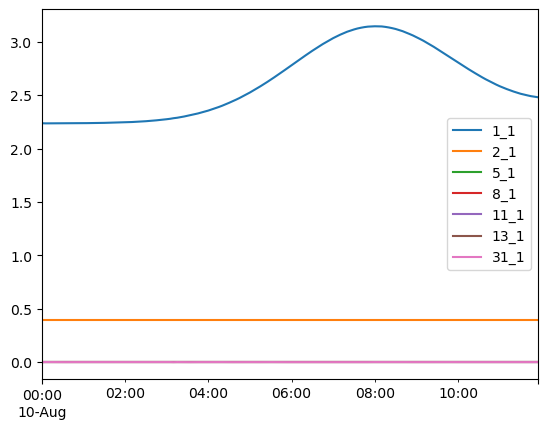

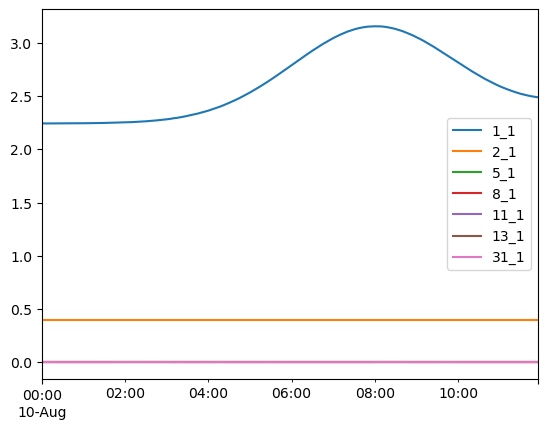

In [13]:
engine.psse.grid.gen_t.p.plot()
engine.pypsa.grid.gen_t.p.plot()

<AxesSubplot:>

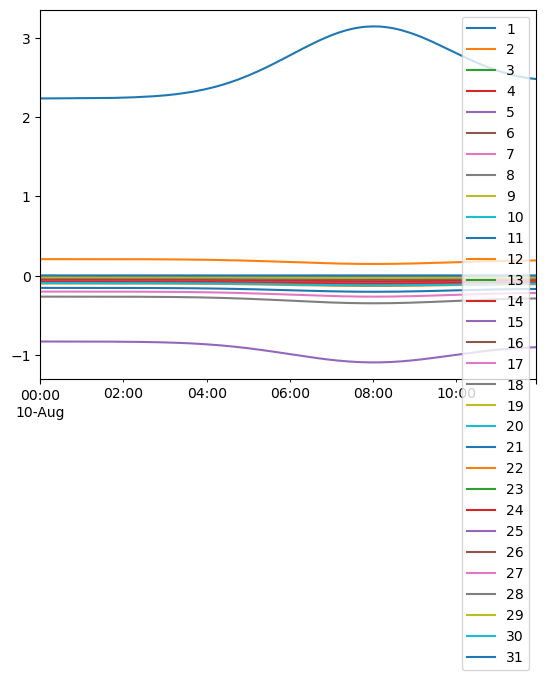

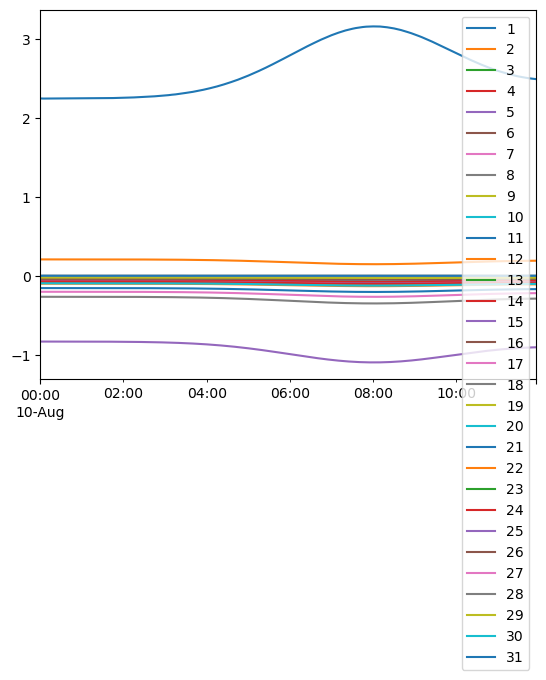

In [14]:
engine.psse.grid.bus_t.p.plot()
engine.pypsa.grid.bus_t.p.plot()

<AxesSubplot:>

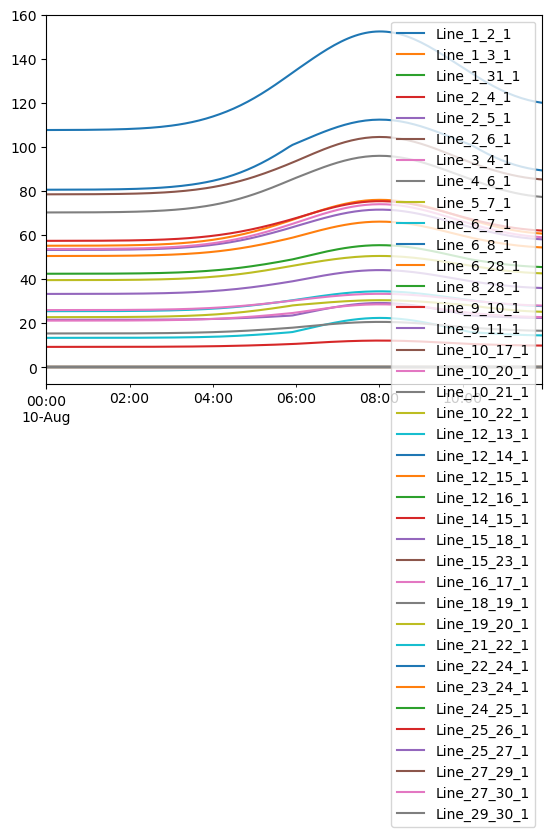

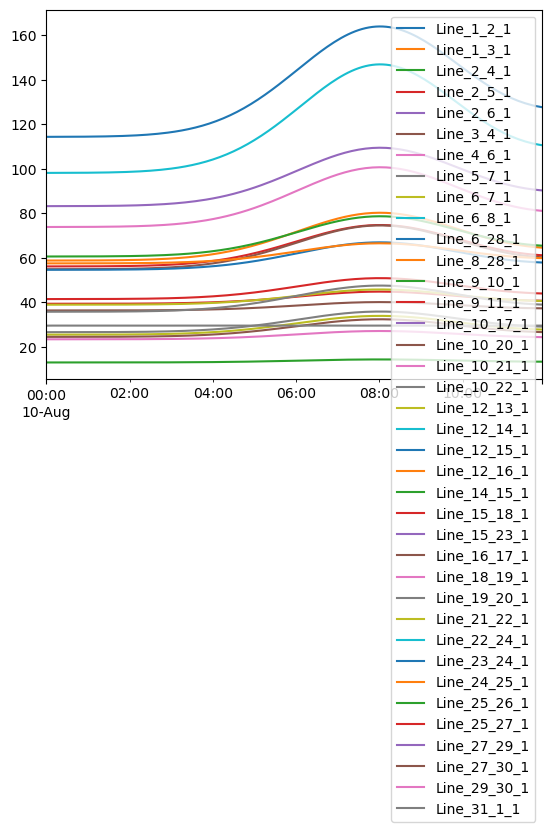

In [15]:
engine.psse.grid.line_t.line_pct.plot()
engine.pypsa.grid.line_t.line_pct.plot()

In [9]:
engine.psse.load

,bus,p,q,base,status
load,,,,,
Load_2_1,2,0.208118,0.127,100.0,1
Load_3_1,3,0.023018,0.012,100.0,1
Load_4_1,4,0.072889,0.016,100.0,1
Load_5_1,5,0.903443,0.190,100.0,1
Load_7_1,7,0.218668,0.109,100.0,1
Load_8_1,8,0.287721,0.300,100.0,1
Load_10_1,10,0.055626,0.020,100.0,1
Load_12_1,12,0.107416,0.075,100.0,1
Load_14_1,14,0.059462,0.016,100.0,1


In [10]:
engine.pypsa.load

,bus,p,q,base,status
load,,,,,
Load_2_1,2,0.208118,0.127,100.0,1
Load_3_1,3,0.023018,0.012,100.0,1
Load_4_1,4,0.072889,0.016,100.0,1
Load_5_1,5,0.903443,0.190,100.0,1
Load_7_1,7,0.218668,0.109,100.0,1
Load_8_1,8,0.287721,0.300,100.0,1
Load_10_1,10,0.055626,0.020,100.0,1
Load_12_1,12,0.107416,0.075,100.0,1
Load_14_1,14,0.059462,0.016,100.0,1


In [18]:
engine.pypsa.network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
L0,2,AC,,12.550890,12.7,-1.0
L1,3,AC,,1.388117,1.2,-1.0
L2,4,AC,,4.395703,1.6,-1.0
L3,5,AC,,54.483582,19.0,-1.0
L4,7,AC,,13.187109,10.9,-1.0
L5,8,AC,,17.351461,30.0,-1.0
L6,10,AC,,3.354616,2.0,-1.0
L7,12,AC,,6.477878,7.5,-1.0
L8,14,AC,,3.585968,1.6,-1.0
